<a href="https://colab.research.google.com/github/avimec13/project1/blob/master/Algo-trading-basic-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import requests
import pandas as pd
import datetime as dt
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib as mt

In [15]:
pip install yfinance

In [16]:
url = "https://in.finance.yahoo.com/quote/SBIN.NS/balance-sheet?p=SBIN.NS"
page = requests.get(url)
page_content = page.content
soup = BeautifulSoup(page_content,'html.parser')


In [17]:
table = soup.find_all("Pos(r)")


In [ ]:
yf.download("MSFT",period = "1mo",interval = "15m")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-11-04 09:30:00-05:00,213.679993,215.130005,212.418503,213.645004,213.645004,5261289
2020-11-04 09:45:00-05:00,213.669998,213.860001,212.440002,213.750000,213.750000,1854684
2020-11-04 10:00:00-05:00,213.750000,215.550003,213.529999,215.330002,215.330002,2279119
2020-11-04 10:15:00-05:00,215.339996,216.440002,215.139999,215.625000,215.625000,2098985
2020-11-04 10:30:00-05:00,215.630005,216.000000,214.970001,215.089996,215.089996,1324884
...,...,...,...,...,...,...
2020-12-03 14:45:00-05:00,214.600098,215.050003,214.410004,214.889999,214.889999,521804
2020-12-03 15:00:00-05:00,214.880005,215.320007,214.789993,215.270004,215.270004,650271
2020-12-03 15:15:00-05:00,215.259995,215.389999,215.009995,215.147903,215.147903,598504


In [61]:
stocks =  ["AMZN","MSFT","GOOG"]
start = dt.datetime.today()-dt.timedelta(300)
end = dt.datetime.today()
cl_price = pd.DataFrame()
for ticker in stocks:
  cl_price[ticker]=yf.download(ticker,start,end)["Adj Close"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
ohlcv_data = {}
for ticker in stocks :
  ohlcv_data[ticker] = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
ohlcv_data["MSFT"]["Adj Close"]

Date
2020-11-04    215.824951
2020-11-05    222.706940
2020-11-06    223.135818
2020-11-09    217.819733
2020-11-10    210.459000
2020-11-11    215.984543
2020-11-12    214.877441
2020-11-13    215.944641
2020-11-16    216.662766
2020-11-17    213.900009
2020-11-18    211.080002
2020-11-19    212.419998
2020-11-20    210.389999
2020-11-23    210.110001
2020-11-24    213.860001
2020-11-25    213.869995
2020-11-27    215.229996
2020-11-30    214.070007
2020-12-01    216.210007
2020-12-02    215.369995
2020-12-03    214.240005
Name: Adj Close, dtype: float64

In [31]:
cl_price.fillna(method='bfill',axis=0,inplace =True)
#cl_price.dropna(axis=0,how='any')
#axis =0 for column,axis =1 for rows


In [46]:
#cl_price.mean()


In [45]:
daily_returns = cl_price.pct_change()


In [44]:
pct_return=(cl_price /cl_price.shift(1))-1
#shift command takes 1 value up

In [59]:
#daily_returns.rolling(window=10,min_periods = 1).mean()
daily_returns.ewm(span=10,min_periods=10).mean()

,AMZN,MSFT,GOOG
Date,,,
2020-11-04,NaN,NaN,NaN
2020-11-05,NaN,NaN,NaN
2020-11-06,NaN,NaN,NaN
2020-11-09,NaN,NaN,NaN
2020-11-10,NaN,NaN,NaN
2020-11-11,NaN,NaN,NaN
2020-11-12,NaN,NaN,NaN
2020-11-13,NaN,NaN,NaN
2020-11-16,NaN,NaN,NaN


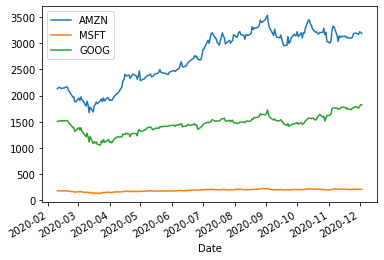

In [65]:
cl_price.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e77199e48>],
      dtype=object)

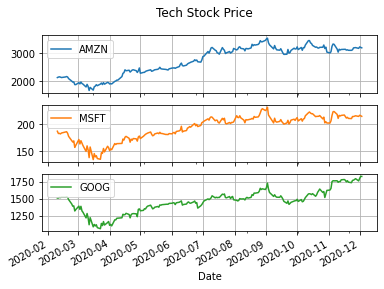

In [67]:
cl_price.plot(subplots=True,layout=(3,1),title ="Tech Stock Price",grid=True)

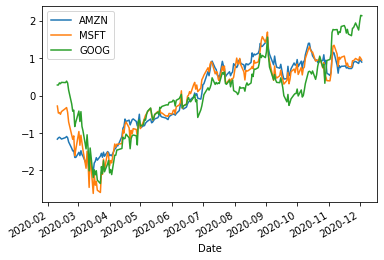

In [64]:
cp_std = (cl_price-cl_price.mean())/cl_price.std()
cp_std.plot()